# Objective/Problem statement- To predict the price of a house in Ames city of IOWA state in USA with given/required features

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Training dataset into df

In [2]:
df=pd.read_csv("C:\\Users\\shrut\\Downloads\\Housepriceprediction.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking shape(rows x columns) of dataset
df.shape

(1460, 81)

In [5]:
#To check the null/non null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Checking for null values in columns

In [6]:
#Writing a function to print null values in a dataframe
def nullvalues(a):
    col=a.columns
    for i in col:
        print(i,a[i].isnull().sum())

In [7]:
nullvalues(df)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

# Dropping columns where total null values > 85% of the total record

In [8]:
#Finding the features/columns where more than 85% of records are null values
drop_col=[]
col=df.columns
for i in col:
    if df[i].isna().sum()>(.85*df.shape[0]):
        drop_col.append(i)        

In [9]:
drop_col

['Alley', 'PoolQC', 'MiscFeature']

In [10]:
#dropping columns
df.drop(drop_col,axis=1,inplace=True)

In [11]:
df.shape

(1460, 78)

# Printing null values for the features

In [12]:
nullvalues(df)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
Fence 1179
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
SalePrice

# Columns containing null values

In [13]:
#Function to find the features/columns containing null values
def column_null_values(x):
    nullvalue=[]
    for i in x.columns:
        if x[i].isna().sum()>0:
            nullvalue.append(i)
    return nullvalue
        

In [14]:
col_containing_nulls=column_null_values(df)

In [15]:
df[col_containing_nulls]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,Fence
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,MnPrv
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,GdPrv
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN


In [16]:
for i in col_containing_nulls:
    print(f"The column {i} contains {df[i].isna().sum()} null values")

The column LotFrontage contains 259 null values
The column MasVnrType contains 8 null values
The column MasVnrArea contains 8 null values
The column BsmtQual contains 37 null values
The column BsmtCond contains 37 null values
The column BsmtExposure contains 38 null values
The column BsmtFinType1 contains 37 null values
The column BsmtFinType2 contains 38 null values
The column Electrical contains 1 null values
The column FireplaceQu contains 690 null values
The column GarageType contains 81 null values
The column GarageYrBlt contains 81 null values
The column GarageFinish contains 81 null values
The column GarageQual contains 81 null values
The column GarageCond contains 81 null values
The column Fence contains 1179 null values


# Treating Numerical Features Containing Null Values

# LotFrontage

In [17]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

# Finding whether outliers exists?

In [18]:
#Outliers
# q1-1.5IQR
# q3+1.5IQR
q1=59.0 #from df['LotFrontage'].describe we can get this q1,q3
q3=80.0
def outlier(q1,q3,data):
    outliers=[]
    IQR=q3-q1
    Upper=q3+(1.5*IQR)
    Lower=q1-(1.5*IQR)    
    for i in data:
        if i>Upper or i<Lower:
            outliers.append(i)
    return len(outliers)

In [19]:
outlier(59.0,80.0,df['LotFrontage'])

88

In [20]:
df['LotFrontage'].fillna(69.0,inplace=True)

In [21]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [22]:
df['LotFrontage'].isna().sum()

0

# MasVnrArea

In [23]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
outlier(0.00,166.00,df['MasVnrArea'])

96

In [25]:
df['MasVnrArea'].fillna(0.0,inplace=True)

In [26]:
df['MasVnrArea'].isna().sum()

0

# GarageYrBlt

In [27]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [28]:
outlier(1961.00,2002.00,df['GarageYrBlt'])

0

In [29]:
df['GarageYrBlt'].fillna(1978.00,inplace=True)

In [30]:
df['GarageYrBlt'].dtype

dtype('float64')

In [31]:
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

In [32]:
df['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int32
dtypes: int32(1)
memory usage: 5.8 KB


# Treating Categorical Features Containing Null Values

In [33]:
col_containing_nulls_2=column_null_values(df)

In [34]:
col_containing_nulls_2

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

In [35]:
df[col_containing_nulls_2]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,Fence
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,MnPrv
1457,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,GdPrv
1458,None,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN


In [36]:
df[col_containing_nulls_2].isna().sum()

MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

# Dropping catogorical features with null values >600

In [37]:
df.drop(['Fence','FireplaceQu'],inplace=True,axis=1)

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
column_null_values(df)

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

# Filling Null Values Of Categorical Features With Mode

In [40]:
cat_col=column_null_values(df)
for i in cat_col:
    print(df[i].mode())

0    None
Name: MasVnrType, dtype: object
0    TA
Name: BsmtQual, dtype: object
0    TA
Name: BsmtCond, dtype: object
0    No
Name: BsmtExposure, dtype: object
0    Unf
Name: BsmtFinType1, dtype: object
0    Unf
Name: BsmtFinType2, dtype: object
0    SBrkr
Name: Electrical, dtype: object
0    Attchd
Name: GarageType, dtype: object
0    Unf
Name: GarageFinish, dtype: object
0    TA
Name: GarageQual, dtype: object
0    TA
Name: GarageCond, dtype: object


In [41]:
cat_col=column_null_values(df)
for i in cat_col:
    df[i]=df[i].fillna(value=df[i].mode()[0])

# Final Check For Null Values

In [42]:
nullvalues(df)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
SalePrice 0


# Dropping Id Column

In [43]:
df.drop('Id',inplace=True,axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Checking For Duplicated Records

In [45]:
df.duplicated().sum()

0

# Feature Engineering

# Creating New Feature "AgeOfHouse" Using apply Function

In [46]:
df['AgeOfHouse']=df.apply(lambda a:a.YrSold-a.YearBuilt,axis=1)

In [47]:
df['AgeOfHouse']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: AgeOfHouse, Length: 1460, dtype: int64

In [48]:
df.drop(['YearBuilt','YrSold'],axis=1,inplace=True)

# Dataframe Containing Numerical Features

In [49]:
df_numerical_features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                          '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                          '3SsnPorch','ScreenPorch','PoolArea','GarageYrBlt','YearRemodAdd','MoSold','AgeOfHouse','MiscVal']]

In [50]:
df_numerical_features

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,GarageYrBlt,YearRemodAdd,MoSold,AgeOfHouse,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,61,0,0,0,0,2003,2003,2,5,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1976,1976,5,31,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,42,0,0,0,0,2001,2002,9,7,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,35,272,0,0,0,1998,1970,2,91,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,84,0,0,0,0,2000,2000,12,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,40,0,0,0,0,1999,2000,8,8,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,0,0,0,0,0,1978,1988,2,32,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,60,0,0,0,0,1941,2006,5,69,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,0,112,0,0,0,1950,1996,4,60,0


In [51]:
df_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  PoolArea       1460 non-null   int64  
 18  GarageYr

In [52]:
df_numerical_features.shape

(1460, 23)

# Dataframe Containing Categorical Features

In [53]:
x=df_numerical_features.columns
categorical_features=[]
for i in df.columns:
    if i not in x and i!=('SalePrice'):
        categorical_features.append(i)

In [54]:
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [55]:
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   int64 
 14  OverallCond    1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [56]:
df[categorical_features].shape

(1460, 50)

In [57]:
df_categorical_features=df[categorical_features]

# Target Or Dependent Variable

In [58]:
df_target=df['SalePrice']

In [59]:
df_target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [60]:
df_target.isna().sum()

0

# Final Shape Of DataFrame

In [61]:
df.shape

(1460, 74)

In [62]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,WD,Normal,250000,8


# Exploratory Data Analysis

# Scatter Plots

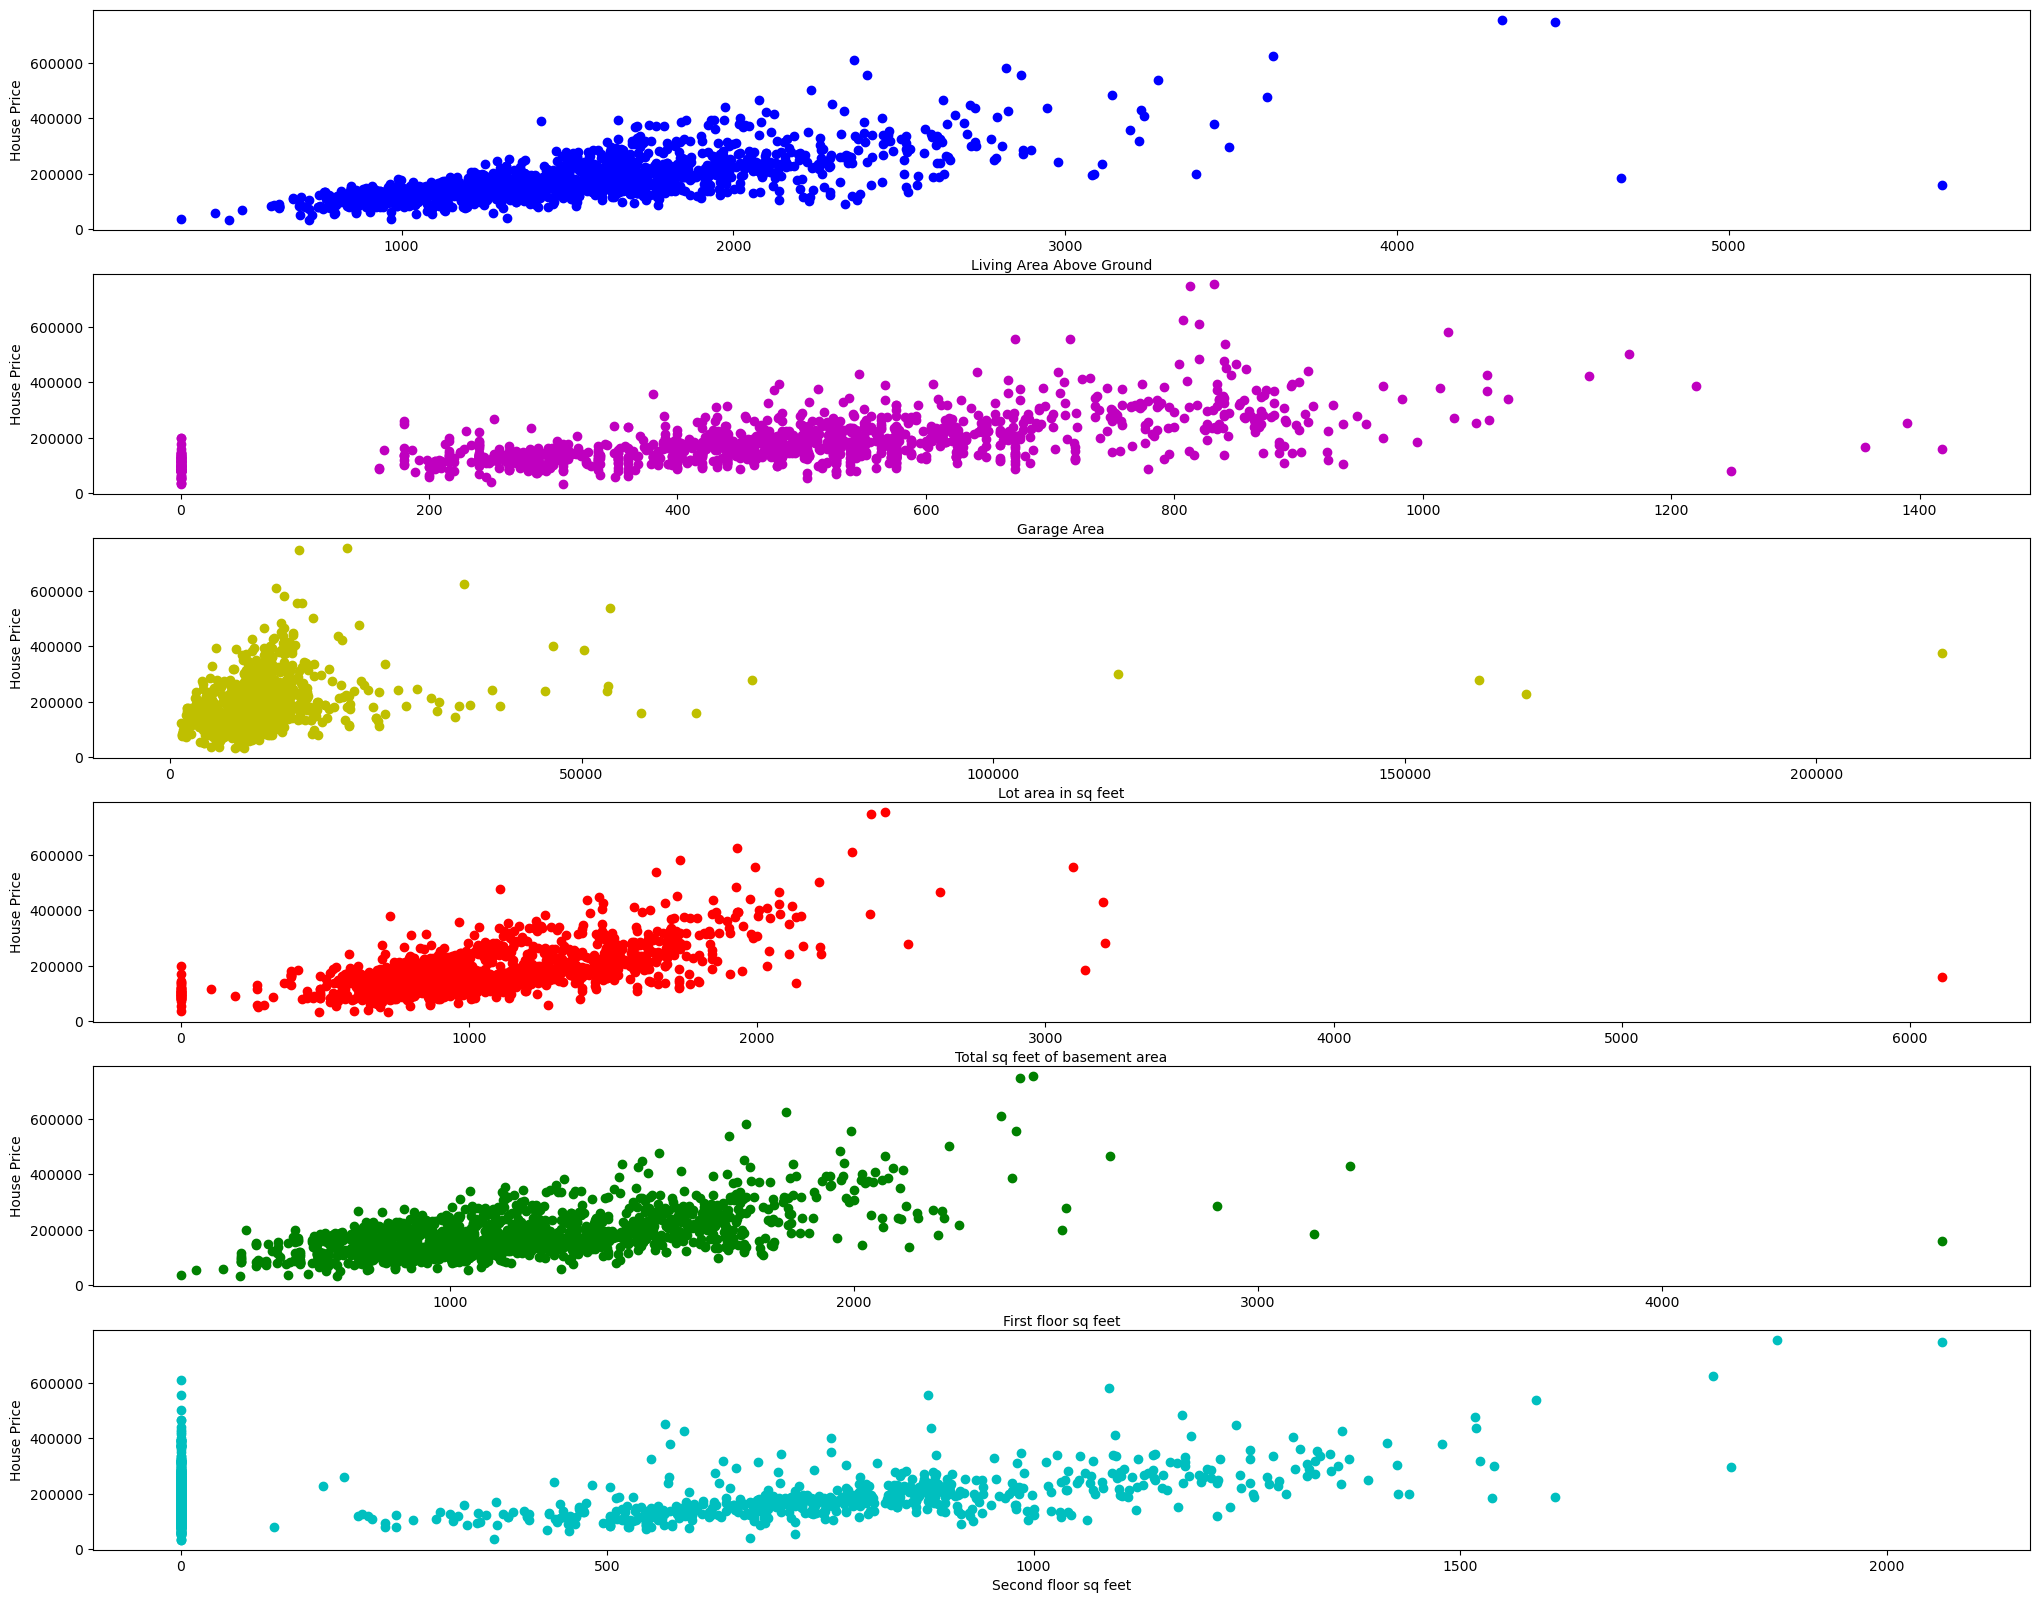

In [63]:
fig, ax = plt.subplots(6, figsize=(25,20))
ax[0].scatter(x=df_numerical_features['GrLivArea'], y = df_target,c='b')
ax[0].set_xlabel("Living Area Above Ground")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = df_numerical_features['GarageArea'], y = df_target,c='m')
ax[1].set_xlabel("Garage Area")
ax[1].set_ylabel("House Price")

ax[2].scatter(x=df_numerical_features['LotArea'],y=df_target,c='y')
ax[2].set_xlabel("Lot area in sq feet")
ax[2].set_ylabel("House Price")

ax[3].scatter(x=df_numerical_features['TotalBsmtSF'],y=df_target,c='r')
ax[3].set_xlabel("Total sq feet of basement area")
ax[3].set_ylabel("House Price")

ax[4].scatter(x=df_numerical_features['1stFlrSF'],y=df_target,c='g')
ax[4].set_xlabel("First floor sq feet")
ax[4].set_ylabel("House Price")

ax[5].scatter(x=df_numerical_features['2ndFlrSF'],y=df_target,c='c')
ax[5].set_xlabel("Second floor sq feet")
ax[5].set_ylabel("House Price")


plt.show()


# Heatmap

In [64]:
df_numerical_features.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,GarageYrBlt,YearRemodAdd,MoSold,AgeOfHouse,MiscVal
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,...,0.137014,0.010287,0.061945,0.037655,0.180819,0.064833,0.083348,0.010451,-0.116223,-0.000255
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.084774,-0.018340,0.020423,0.043160,0.077672,-0.024454,0.013788,0.001205,-0.014832,0.038068
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.122528,-0.109907,0.019144,0.062248,0.011928,0.246754,0.176529,-0.006723,-0.311479,-0.029512
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.150858,0.128451,-0.015727,-0.248483,0.003571
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.086933,-0.067759,-0.015211,0.050422,0.004940
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.186255,0.181133,0.034888,-0.150619,-0.023837
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.247264,-0.095478,0.037384,0.084489,0.126053,0.312470,0.291066,0.013196,-0.391498,-0.018479
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.211671,-0.065292,0.056104,0.088758,0.131525,0.227872,0.240379,0.031372,-0.282143,-0.021096
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.208026,0.061989,-0.024358,0.040606,0.081487,0.069608,0.140024,0.035164,-0.011552,0.016197
LowQualFinSF,0.037469,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.029868,-0.062419,-0.022174,0.182228,-0.003793


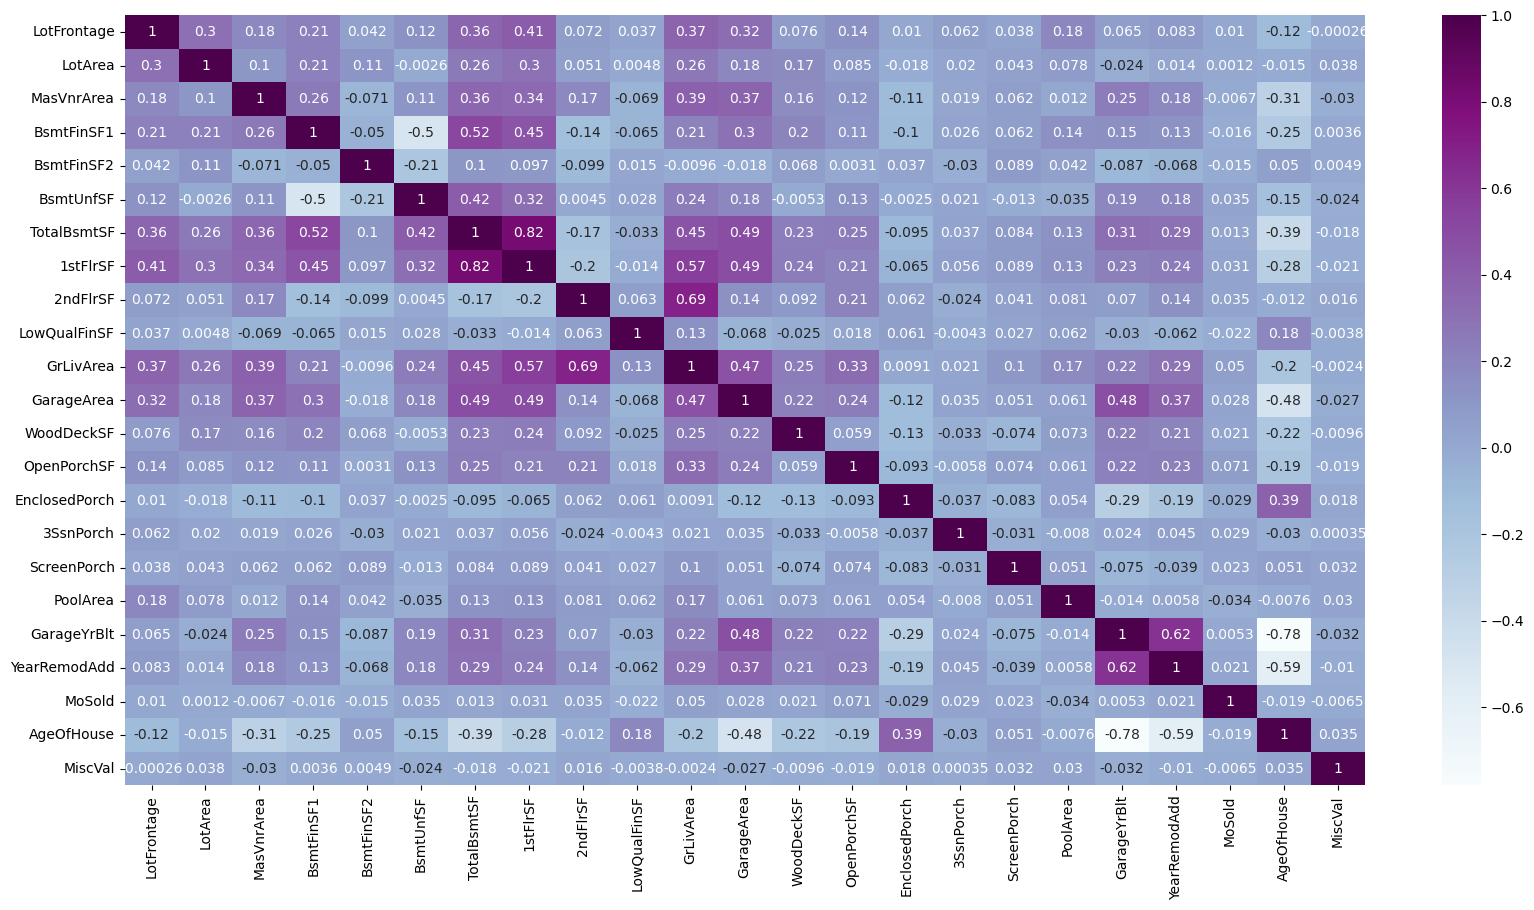

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numerical_features.corr(),cmap='BuPu',annot=True)
plt.show()


# Distribution of House Sale Price-Histogram

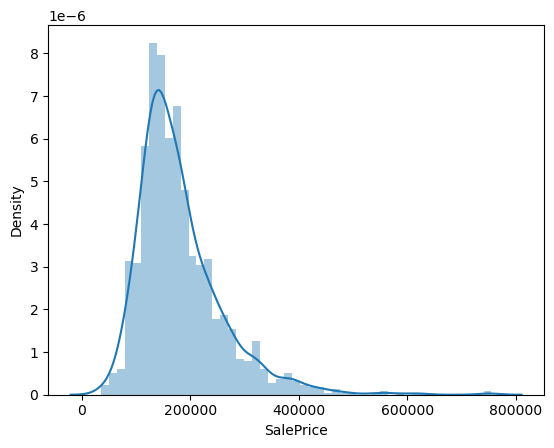

In [66]:
sns.distplot(df_target,kde=True)
plt.show()

# Boxplots

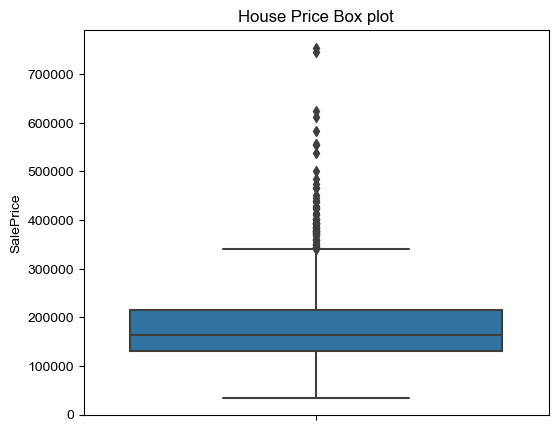

In [67]:
plt.figure(figsize=(6,5))
plt.title("House Price Box plot")
sns.set_style('darkgrid')
sns.boxplot(y=df_target)
plt.show()

In [68]:
df_target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [69]:
df_target.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

In [70]:
#Outliers
# q1-1.5IQR
# q3+1.5IQR
outliers=[]
q1=129975.000000 #from df_target.describe we can get this q1,q3
q3=214000.000000
def outlier4(data):
    IQR=q3-q1
    Upper=q3+(1.5*IQR)
    Lower=q1-(1.5*IQR)    
    for i in data:
        if i>Upper or i<Lower:
            outliers.append(i)
    return len(outliers)

In [71]:
outlier4(df_target)

61

In [72]:
df_categorical_features

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,0,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,1,Detchd,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,1,Attchd,RFn,3,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Min1,2,Attchd,Unf,2,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Typ,2,Attchd,RFn,1,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,0,Attchd,Unf,1,TA,TA,Y,WD,Normal


# Countplots

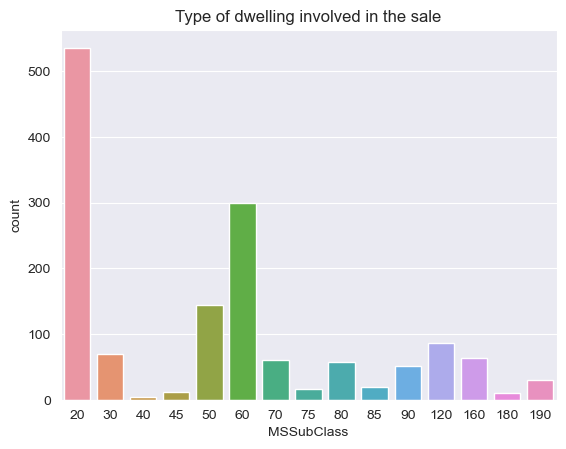

In [73]:
plt.title("Type of dwelling involved in the sale")
sns.countplot(x=df_categorical_features['MSSubClass'])
plt.show()

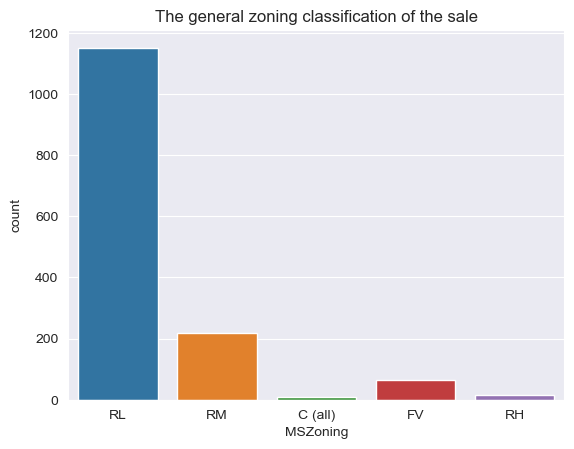

In [74]:
plt.title("The general zoning classification of the sale")
sns.countplot(x=df_categorical_features['MSZoning'])
plt.show()

In [75]:
# A	Agriculture
# C	Commercial
# FV	Floating Village Residential
# I	Industrial
#RH	Residential High Density
#RL	Residential Low Density
# RP	Residential Low Density Park 
#RM	Residential Medium Density

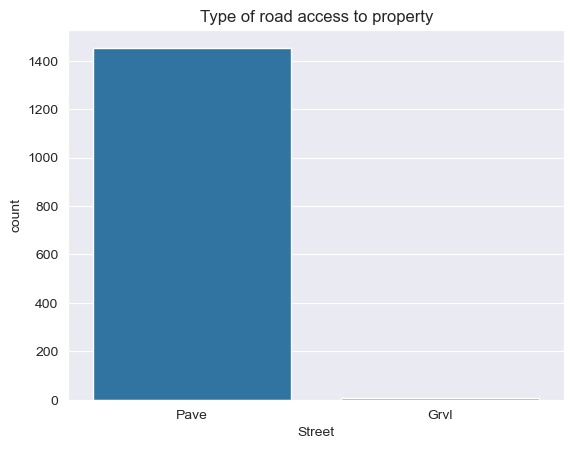

In [76]:
plt.title("Type of road access to property")
sns.countplot(x=df_categorical_features['Street'])
plt.show()

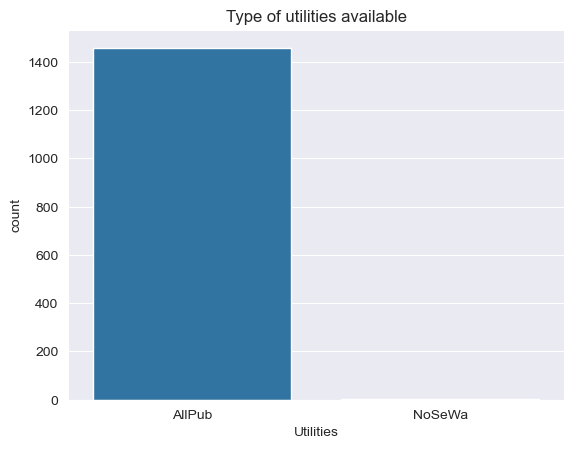

In [77]:
plt.title("Type of utilities available")
sns.countplot(x=df_categorical_features['Utilities'])
plt.show()

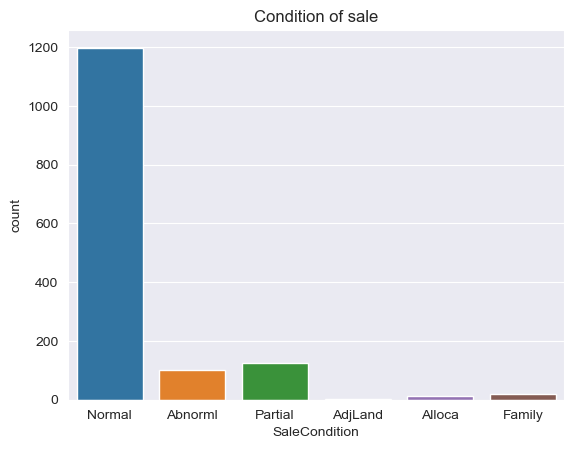

In [78]:
plt.title("Condition of sale")
sns.countplot(x=df_categorical_features['SaleCondition'])
plt.show()

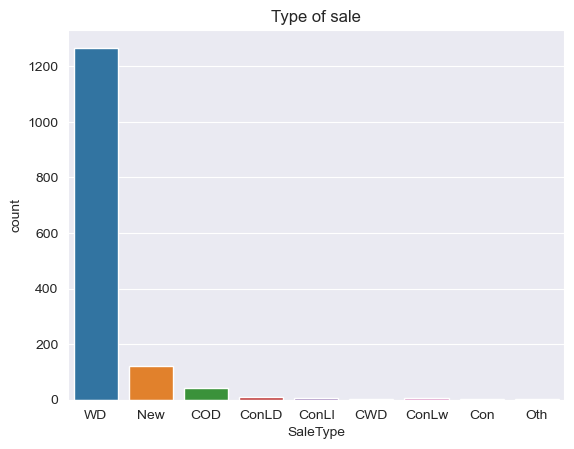

In [79]:
plt.title("Type of sale")
sns.countplot(x=df_categorical_features['SaleType'])
plt.show()

In [80]:
# WD 	Warranty Deed - Conventional
# CWD	Warranty Deed - Cash
# VWD	Warranty Deed - VA Loan
# New	Home just constructed and sold
# COD	Court Officer Deed/Estate
# Con	Contract 15% Down payment regular terms
# ConLw	Contract Low Down payment and low interest
# ConLI	Contract Low Interest
# ConLD	Contract Low Down
#Oth	Other

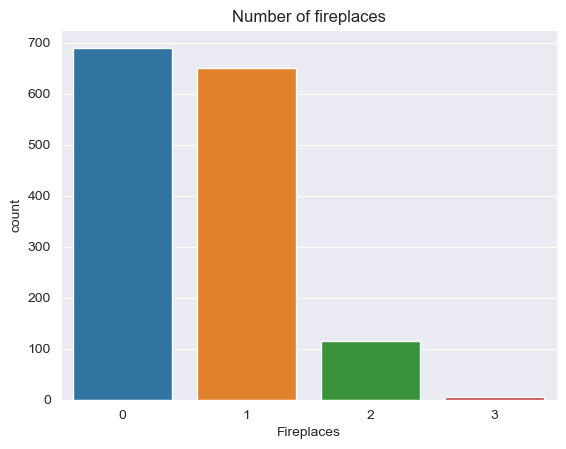

In [81]:
 plt.title("Number of fireplaces")
sns.countplot(x=df_categorical_features['Fireplaces'])
plt.show()

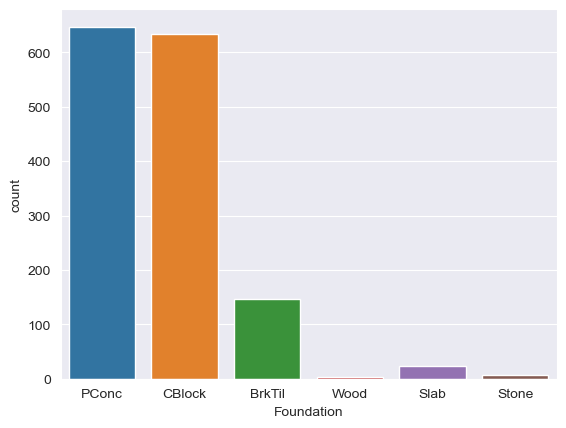

In [82]:
sns.countplot(x=df_categorical_features['Foundation'])
plt.show()

# Bar Graph

# Total House price based on Roof Style

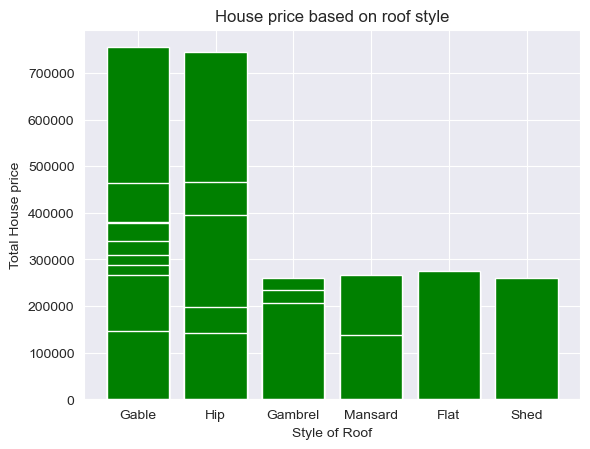

In [83]:
plt.title("House price based on roof style")
plt.xlabel("Style of Roof")
plt.ylabel("Total House price")
plt.bar(df_categorical_features['RoofStyle'],df_target,color='green')
plt.show()

# Total House price based on Foundation

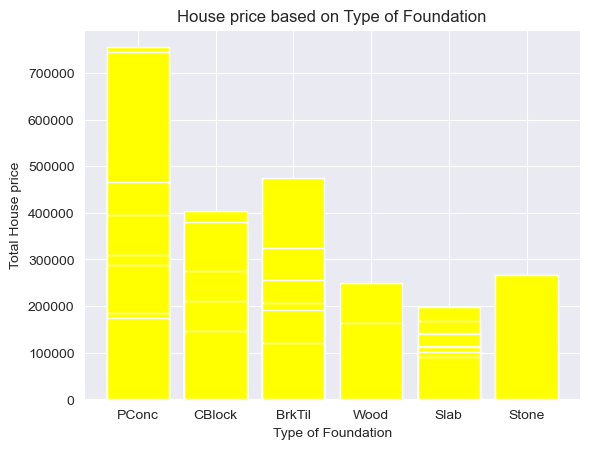

In [84]:
plt.title("House price based on Type of Foundation")
plt.xlabel("Type of Foundation")
plt.ylabel("Total House price")
plt.bar(df_categorical_features['Foundation'],df_target,color='yellow')
plt.show()

In [85]:
df_categorical_features['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

# Violinplot

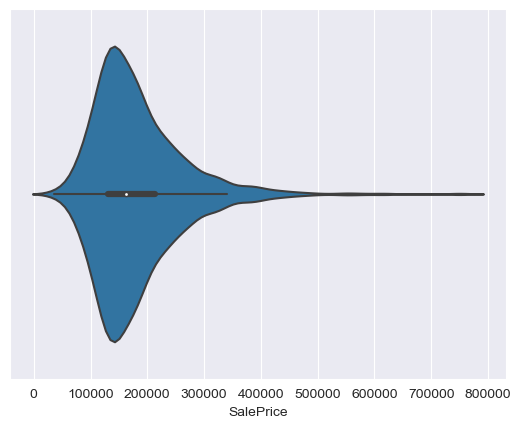

In [86]:
#It shows the price distribution of house price is concentrated between 100000-200000 dollars
sns.violinplot(df_target)
plt.show()

# Cleaning Test Data

In [87]:
df_test=pd.read_csv("C:\\Users\\shrut\\Downloads\\Datasets\\test_house_price.csv")

In [88]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [89]:
df_test.shape

(1459, 80)

In [90]:
df_test['AgeOfHouse']=df_test.apply(lambda a:a.YrSold-a.YearBuilt,axis=1)

In [91]:
df_test['AgeOfHouse']

0       49
1       52
2       13
3       12
4       18
        ..
1454    36
1455    36
1456    46
1457    14
1458    13
Name: AgeOfHouse, Length: 1459, dtype: int64

In [92]:
df_test.drop(['YearBuilt','YrSold','Id','Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [93]:
df_test.shape

(1459, 75)

In [94]:
df_test.drop(['Fence','FireplaceQu'],axis=1,inplace=True)

In [95]:
df_test.shape

(1459, 73)

In [96]:
col_containing_null=column_null_values(df_test)
col_containing_null

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [97]:
df_test_numerical_features=df_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
                                    'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','GarageYrBlt','YearRemodAdd','MoSold',
                                    'AgeOfHouse','MiscVal']]

In [98]:
df_test_numerical_features.shape

(1459, 23)

In [99]:
x=df_test_numerical_features.columns
categorical_features=[]
for i in df_test.columns:
    if i not in x:
        categorical_features.append(i)
    else:
        continue

In [100]:
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [101]:
nullvalues(df_test)

MSSubClass 0
MSZoning 4
LotFrontage 227
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 2
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 2
BsmtHalfBath 2
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 1
TotRmsAbvGrd 0
Functional 2
Fireplaces 0
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
SaleType 1
SaleCondition 0
AgeOfHouse 0


In [102]:
for i in categorical_features:
    df_test[i]=df_test[i].fillna(value=df_test[i].mode()[0])

In [103]:
column_null_values(df_test)

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea']

In [104]:
num_col=['GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','MasVnrArea','LotFrontage','GarageYrBlt']

<function matplotlib.pyplot.show(close=None, block=None)>

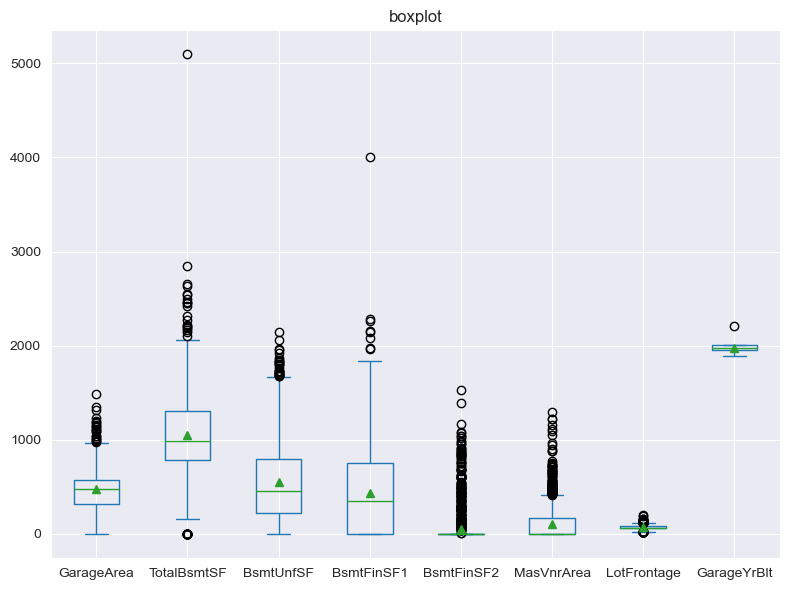

In [105]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
ax = df_test[num_col].plot(kind='box', title='boxplot', showmeans=True)
plt.show

In [106]:
for i in num_col:
    df_test[i].fillna(df_test[i].median(),inplace=True)

In [107]:
column_null_values(df_test)

[]

In [108]:
nullvalues(df_test)

MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
SaleType 0
SaleCondition 0
AgeOfHouse 0


In [109]:
df_test.duplicated().sum()

0

# Preprocessing

# Label Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
df_categoricalfeatures=df.select_dtypes(exclude=[np.number])
categoricalfeatures=df_categoricalfeatures.columns
for i in categoricalfeatures:
    df[i]=le.fit_transform(df[i])
    

In [112]:
df_categoricalfeatures.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [113]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,8,4,208500,5
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,8,4,181500,31
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,8,4,223500,7
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,8,0,140000,91
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,8,4,250000,8


# Machine Learning Models-Linear Regression

# Model 1

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
X1=df.drop("SalePrice",axis=1)
y1=df['SalePrice']

In [116]:
X1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,AgeOfHouse
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,8,4,5
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,8,4,31
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,8,4,7
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,8,0,91
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,8,4,8


In [117]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=108)

In [118]:
lr=LinearRegression()

In [119]:
lr.fit(X1_train,y1_train)

LinearRegression()

In [120]:
y_pred1=lr.predict(X1_test)

In [121]:
#Function to find R2 score and mse
def performance(truevalue,predictedvalue):
    R2=r2_score(truevalue,predictedvalue)
    mse=mean_squared_error(truevalue,predictedvalue,squared=False)
    print(f"The R-squared value is {R2}")
    print(f"The cost function is {mse}")    

In [122]:
performance(y1_test,y_pred1)

The R-squared value is 0.845840137091261
The cost function is 29881.066386467086


# Feature Scaling

# Robust Scaler

In [123]:
from sklearn.preprocessing import RobustScaler

In [124]:
rs=RobustScaler()

In [125]:
X2=df.drop("SalePrice",axis=1)
y2=df['SalePrice']

In [126]:
df_numericalfeatures=df.select_dtypes(include=[np.number])
df_numericalfeatures.drop('SalePrice',axis=1,inplace=True)
df_numericalfeatures.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,AgeOfHouse
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,8,4,5
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,8,4,31
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,8,4,7
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,8,0,91
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,8,4,8


In [127]:
c=df_numericalfeatures.columns
for i in c :
    X2[i]=rs.fit_transform(X2[i].values.reshape(-1,1))

In [128]:
X2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,AgeOfHouse
0,0.2,0.0,-0.210526,-0.254076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,-0.652174
1,-0.6,0.0,0.578947,0.030015,0.0,0.0,0.0,0.0,-1.0,0.0,...,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,-0.086957
2,0.2,0.0,-0.052632,0.437624,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,-0.608696
3,0.4,0.0,-0.473684,0.017663,0.0,-1.0,0.0,0.0,-2.0,0.0,...,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,0.0,-4.0,1.217391
4,0.2,0.0,0.789474,1.181201,0.0,-1.0,0.0,0.0,-1.0,0.0,...,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,-0.586957


# Model2

In [129]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=108)

In [130]:
lr.fit(X2_train,y2_train)

LinearRegression()

In [131]:
y_pred2=lr.predict(X2_test)

In [132]:
performance(y2_test,y_pred2)

The R-squared value is 0.8458401370912543
The cost function is 29881.066386467748


# Treating Multicollinearity

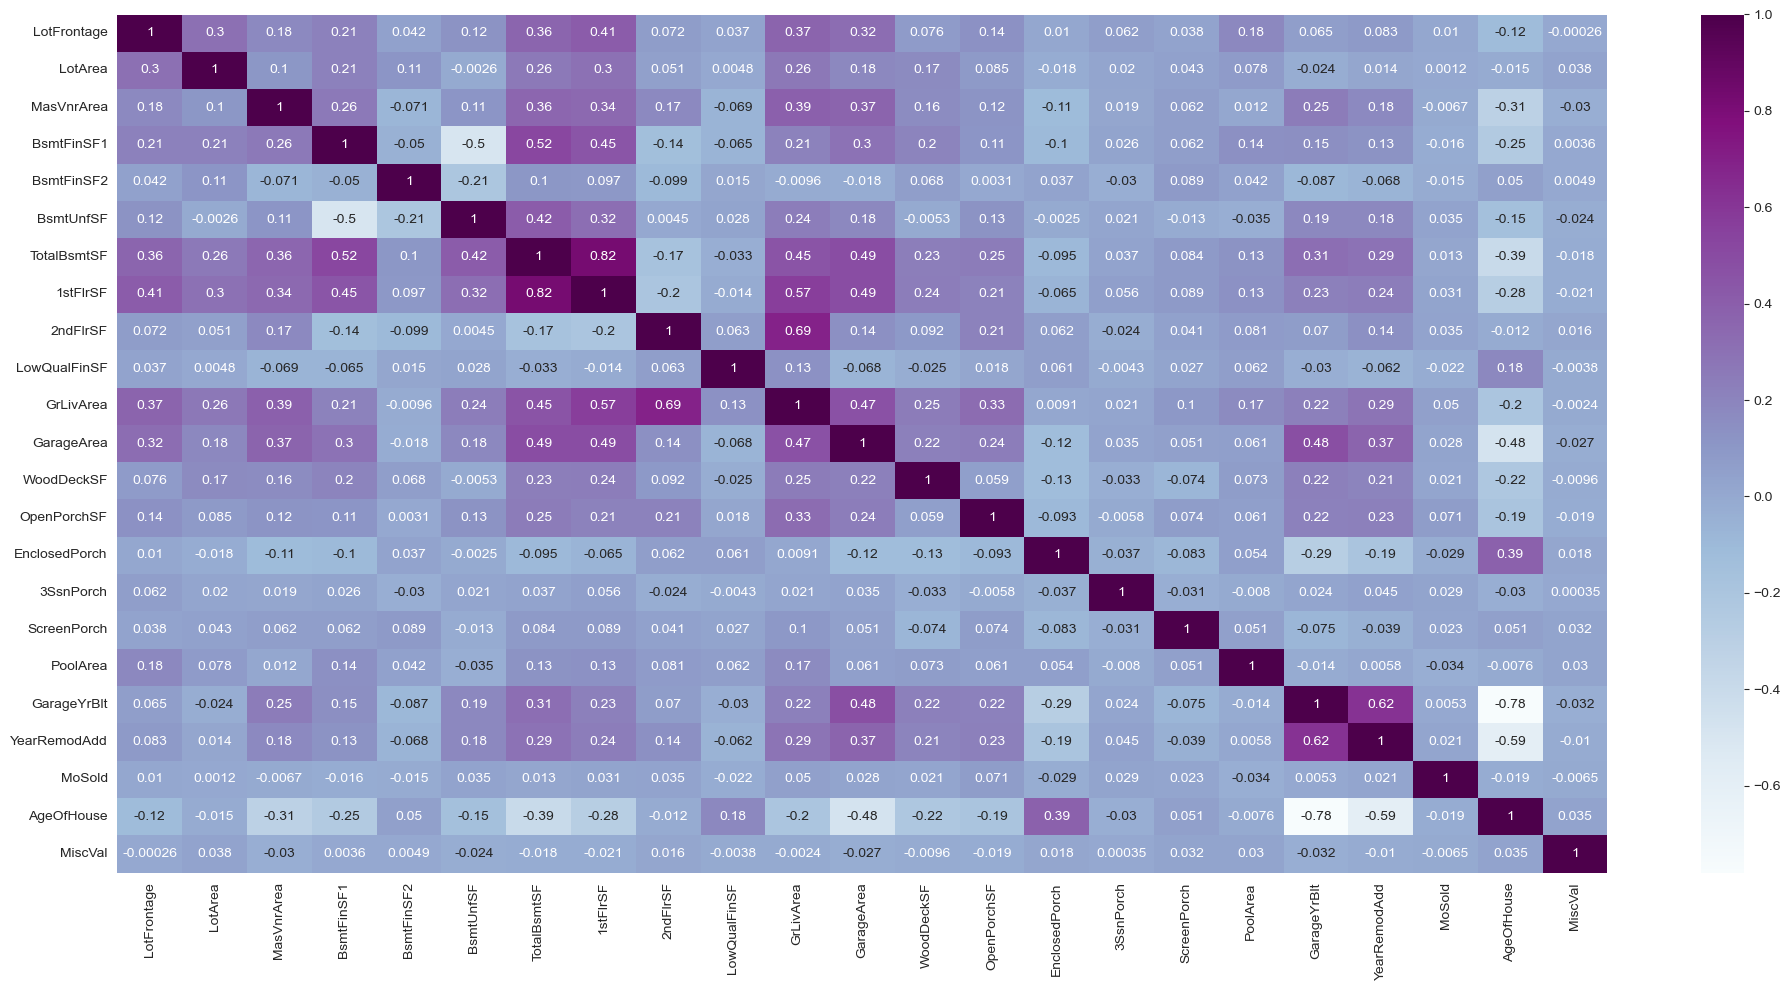

In [133]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numerical_features.corr(),cmap='BuPu',annot=True)
plt.show()

In [134]:
X3=df.drop(['SalePrice','1stFlrSF','2ndFlrSF'],axis=1)
y3=df['SalePrice']

In [135]:
col=df_numericalfeatures.columns
for i in col :
    if i in X3.columns:
        X3[i]=rs.fit_transform(X3[i].values.reshape(-1,1))
    else:
        continue

# Model 3

In [136]:
y3=rs.fit_transform(y3.values.reshape(-1,1))

In [137]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2,random_state=108)

In [138]:
X3_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,AgeOfHouse
730,1.4,0.0,-1.578947,-1.010252,0.0,-1.0,0.0,0.0,0.0,0.0,...,1.867647,0.0,0.0,0.0,0.0,0.0,-1.000000,0.0,0.0,-0.434783
1154,0.2,0.0,0.000000,1.042861,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.867647,0.0,0.0,273.0,0.0,0.0,-0.333333,0.0,0.0,0.173913
1420,0.2,0.0,1.105263,0.548790,0.0,0.0,0.0,0.0,-2.0,0.0,...,2.117647,0.0,0.0,119.0,0.0,0.0,-0.333333,0.0,0.0,0.065217
38,-0.6,0.0,-0.052632,-0.384511,0.0,0.0,0.0,0.0,0.0,0.0,...,0.397059,0.0,0.0,0.0,0.0,0.0,-1.666667,0.0,-4.0,0.478261
388,-0.6,0.0,1.263158,-0.023839,0.0,-1.0,0.0,0.0,-1.5,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,-0.565217


In [139]:
lr.fit(X3_train,y3_train)

LinearRegression()

In [140]:
y_pred3=lr.predict(X3_test)

In [141]:
performance(y3_test,y_pred3)

The R-squared value is 0.845976249770669
The cost function is 0.3554641118501736


# Model 4 Decision Tree Regressor

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [144]:
regressor.fit(X3_train,y3_train)

DecisionTreeRegressor(random_state=0)

In [145]:
y_pred4=regressor.predict(X3_test)

In [146]:
performance(y3_test,y_pred4)

The R-squared value is 0.7190508294999287
The cost function is 0.4800824063644714


In [147]:
feature_importances_df=pd.DataFrame({"Feature":list(X3.columns),
                                    "Importance":regressor.feature_importances_}).sort_values('Importance',ascending=False)

In [148]:
feature_importances_df

,Feature,Importance
15,OverallQual,0.646337
41,GrLivArea,0.106380
35,TotalBsmtSF,0.055587
17,YearRemodAdd,0.045241
10,Neighborhood,0.014693
...,...,...
12,Condition2,0.000000
4,Street,0.000000
43,BsmtHalfBath,0.000000
40,LowQualFinSF,0.000000


In [149]:
feature_importances_df['Feature'].iloc[:10]

15     OverallQual
41       GrLivArea
35     TotalBsmtSF
17    YearRemodAdd
10    Neighborhood
55      GarageCars
31      BsmtFinSF1
56      GarageArea
60      WoodDeckSF
67          MoSold
Name: Feature, dtype: object

In [150]:
imp_feature=feature_importances_df['Feature'].iloc[:10]

In [151]:
imp_feature

15     OverallQual
41       GrLivArea
35     TotalBsmtSF
17    YearRemodAdd
10    Neighborhood
55      GarageCars
31      BsmtFinSF1
56      GarageArea
60      WoodDeckSF
67          MoSold
Name: Feature, dtype: object

In [152]:
important_features_10=list(imp_feature)

In [153]:
type(important_features_10)

list

# Model 5

In [154]:
X4=df[important_features_10]
y4=df['SalePrice']

In [155]:
X4.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearRemodAdd,Neighborhood,GarageCars,BsmtFinSF1,GarageArea,WoodDeckSF,MoSold
0,7,1710,856,2003,5,2,706,548,0,2
1,6,1262,1262,1976,24,2,978,460,298,5
2,7,1786,920,2002,5,2,486,608,0,9
3,7,1717,756,1970,6,3,216,642,0,2
4,8,2198,1145,2000,15,3,655,836,192,12


In [156]:
for i in important_features_10 :
    X4[i]=rs.fit_transform(X4[i].values.reshape(-1,1))

In [157]:
X4.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearRemodAdd,Neighborhood,GarageCars,BsmtFinSF1,GarageArea,WoodDeckSF,MoSold
0,0.5,0.380070,-0.269652,0.243243,-0.7,0.0,0.452790,0.281573,0.000000,-1.333333
1,0.0,-0.312090,0.538308,-0.486486,1.2,0.0,0.834679,-0.082816,1.773810,-0.333333
2,0.5,0.497489,-0.142289,0.216216,-0.7,0.0,0.143910,0.530021,0.000000,1.000000
3,0.5,0.390885,-0.468657,-0.648649,-0.6,1.0,-0.235170,0.670807,0.000000,-1.333333
4,1.0,1.134029,0.305473,0.162162,0.3,1.0,0.381186,1.474120,1.142857,2.000000


In [158]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.2,random_state=108)

In [159]:
lr.fit(X4_train,y4_train)

LinearRegression()

In [160]:
y_pred5=lr.predict(X4_test)

In [161]:
performance(y4_test,y_pred5)

The R-squared value is 0.7919207280458218
The cost function is 34715.6134927377
